In [1]:
from __future__ import division
import itertools
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import math
from sklearn import metrics
from random import randint
from matplotlib import style
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

In [36]:
five_thirty_eight = [
    "#30a2da",
    "#fc4f30",
    "#e5ae38",
    "#6d904f",
    "#8b8b8b",
]

sns.set_palette(five_thirty_eight)
sns.set()

Clustering - DBSCAN
Use DBSCAN to detect anomalies in other products from the customers dataset.

In [4]:
customerDF = pd.read_csv('customers.csv')

In [5]:
customerDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null int64
Region              440 non-null int64
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: int64(8)
memory usage: 27.6 KB


In [6]:
customerDF.tail()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125
439,1,3,2787,1698,2510,65,477,52


1 SELECT COLUMNS INTO A LITTLE DF

2 CONVERT TO NUMPY ARRAY

3 SCALE

4 CREATE DB-SCAN, then FIT TO ARRAY

5 Get the labels with obj.labels_

6 ATTACH LABELS TO DF

7 EXPLORE!

In [7]:
#1 SELECT COLUMNS INTO A LITTLE DF
littleDF = customerDF[['Grocery','Delicassen']]

In [22]:
#2 CONVERT TO NUMPY ARRAY
customerArray = littleDF.values.astype("float32", copy = False)

In [23]:
customerArray[0:10]

array([[ 7561.,  1338.],
       [ 9568.,  1776.],
       [ 7684.,  7844.],
       [ 4221.,  1788.],
       [ 7198.,  5185.],
       [ 5126.,  1451.],
       [ 6975.,   545.],
       [ 9426.,  2566.],
       [ 6192.,   750.],
       [18881.,  2098.]], dtype=float32)

In [20]:
#3 SCALE
#uses the ol Sk-Learn 1-2-3.

#1-Make the object, 2-Fit the object to the data
scaler = MinMaxScaler().fit(customerArray)
#3-Transform the data with the scaling measurements it found in the data.
customerArrayScaled = scaler.transform(customerArray)

In [21]:
customerArrayScaled[0:10]

array([[0.08146416, 0.02784731],
       [0.10309669, 0.03698373],
       [0.08278992, 0.16355862],
       [0.04546386, 0.03723405],
       [0.07755156, 0.10809346],
       [0.05521844, 0.03020442],
       [0.07514794, 0.0113058 ],
       [0.10156614, 0.05346267],
       [0.06670835, 0.01558198],
       [0.20347719, 0.04370046]], dtype=float32)

In [24]:
#4 CREATE DB-SCAN, then FIT TO ARRAY

#.10 on a 0-1 scale of radius is the search area. If there is 20 points within .10 distance of a datapoint
#It's gonna get a cluster label.
dbsc = DBSCAN(eps = .10, min_samples = 20).fit(customerArrayScaled)

In [25]:
#5 Get the labels with obj.labels_

#From the looks of it, one cluster and a handful of outliers.
dbsc.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [26]:
#6 ATTACH LABELS TO DF
littleDF['cluster_label'] = dbsc.labels_

In [29]:
littleDF.head()

,Grocery,Delicassen,cluster_label
0,7561,1338,0
1,9568,1776,0
2,7684,7844,0
3,4221,1788,0
4,7198,5185,0


In [28]:
#7 EXPLORE!

#First off, we have 10 outliers. 10 datapoints that are not in the .10 radius of 19 other datapoints.
littleDF.cluster_label.value_counts()

 0    430
-1     10
Name: cluster_label, dtype: int64

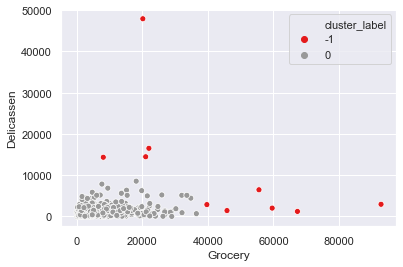

In [40]:
sns.scatterplot(data=littleDF, x='Grocery', y='Delicassen', hue='cluster_label', palette='Set1')

In [ ]:
#Most of the anomalies are in the Grocery dimension. 6 of the 10 are large in that meeasurement. 
#The deli anomalies are just a few parameters tweaks away fro not being anomalies, except for that super-outlier

Use DBSCAN to detect anomalies in number of bedrooms and finished square feet of property for the filtered dataset you used in the clustering project (single unit properties with a logerror).